## K-Means

K-means es un método de aprendizaje no supervisado para agrupar puntos de datos. El algoritmo divide iterativamente los puntos de datos en K clusters minimizando la varianza en cada cluster.

Revisaremos cómo estimar el mejor valor para K utilizando el método del codo (elbow) y, a continuación, utilizar el clustering de K-means para agrupar los puntos de datos en clusters.

### ¿Cómo funciona K-Means?

En primer lugar, cada punto de datos se asigna aleatoriamente a uno de los K clusters. A continuación, calculamos el centroide (funcionalmente el centro) de cada conglomerado y reasignamos cada punto de datos al conglomerado con el centroide más cercano. Este proceso se repite hasta que las asignaciones de clúster de cada punto de datos ya no cambian.

El clustering de K-means requiere que seleccionemos K, el número de clusters en los que queremos agrupar los datos. El método del codo nos permite representar gráficamente la inercia (una métrica basada en la distancia) y visualizar el punto en el que empieza a disminuir linealmente. Este punto se denomina «codo» (elbow) y es una buena estimación del mejor valor de K basado en nuestros datos.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Cree matrices que se asemejen a dos variables de un conjunto de datos. Tenga en cuenta que, aunque aquí sólo utilizamos dos variables, este método funcionará con cualquier número de variables:

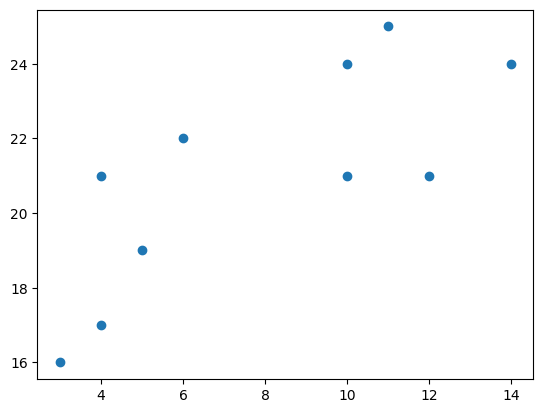

In [1]:
x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

plt.scatter(x, y)
plt.show()

Convierte los datos en un conjunto de puntos:

In [4]:
data = list(zip(x, y))
print(data)

[(4, 21), (5, 19), (10, 24), (4, 17), (3, 16), (11, 25), (14, 24), (6, 22), (10, 21), (12, 21)]


Ahora utilizamos el método del codo para visualizar la inercia para diferentes valores de K. Para encontrar el mejor valor de K, tenemos que ejecutar K-means en nuestros datos para un rango de valores posibles. Sólo tenemos 10 puntos de datos, por lo que el número máximo de clusters es 10. Así que para cada valor K en el rango(1,11), entrenamos un modelo K-means y trazamos la inercia para ese número de clusters:

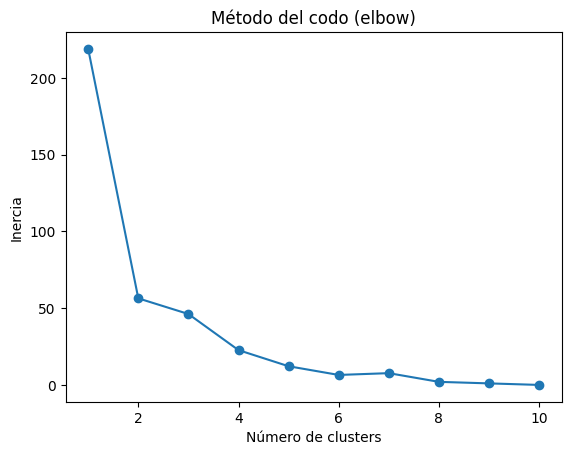

In [2]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Método del codo (elbow)')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.show()

Podemos ver que el «codo» en el gráfico anterior (donde la inercia se hace más lineal) se encuentra en K=2. A continuación, podemos ajustar nuestro algoritmo K-means una vez más y representar gráficamente los distintos conglomerados asignados a los datos:

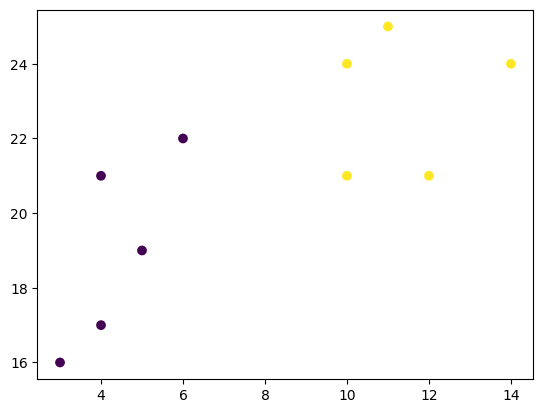

In [3]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)

plt.scatter(x, y, c=kmeans.labels_)
plt.show()